# Plantower data only

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
sns.set()
from datetime import datetime, timedelta
from scipy.signal import savgol_filter 
plt.style.use('seaborn-white')

In [2]:
df=pd.read_csv('C:/Users/nuera/Documents/GitHub/2019_sensor_workshop/sample_data/argon31.csv')


In [3]:
df.head()

,2019-07-25 10:28:02,125250,3,4,4.1,741,201,33,0,0.1,0.2,23.990000,61.650002
0,2019-07-25 10:27:56,125249,4,4,4,741,207,29,0,0,0,23.980000,61.389999
1,2019-07-25 10:27:50,125248,4,4,4,750,207,25,0,0,0,23.920000,61.009998
2,2019-07-25 10:27:43,125247,4,5,5,882,231,30,0,0,0,23.940001,60.880001
3,2019-07-25 10:27:37,125246,4,6,6,954,261,33,0,0,0,23.940001,60.709999
4,2019-07-25 10:27:31,125245,5,6,6,1029,273,40,0,0,0,23.920000,60.680000


In [7]:
df.columns = ["time","id",'pm1.0',"pm2.5","pm10","0.3um","0.5um","1.0um","2.5um","5.0um","10um","temp","RH"]
df['time'] = pd.to_datetime(df['time'])
df.index=df['time']
#df1=df1['2019-07-14 16:54:01':'2019-07-14 21:41:00']

In [10]:
df.head()

,time,id,pm1.0,pm2.5,pm10,0.3um,0.5um,1.0um,2.5um,5.0um,10um,temp,RH
time,,,,,,,,,,,,,
2019-07-25 10:27:56,2019-07-25 10:27:56,125249,4,4,4,741,207,29,0,0,0,23.980000,61.389999
2019-07-25 10:27:50,2019-07-25 10:27:50,125248,4,4,4,750,207,25,0,0,0,23.920000,61.009998
2019-07-25 10:27:43,2019-07-25 10:27:43,125247,4,5,5,882,231,30,0,0,0,23.940001,60.880001
2019-07-25 10:27:37,2019-07-25 10:27:37,125246,4,6,6,954,261,33,0,0,0,23.940001,60.709999
2019-07-25 10:27:31,2019-07-25 10:27:31,125245,5,6,6,1029,273,40,0,0,0,23.920000,60.680000


C:\Users\nuera\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


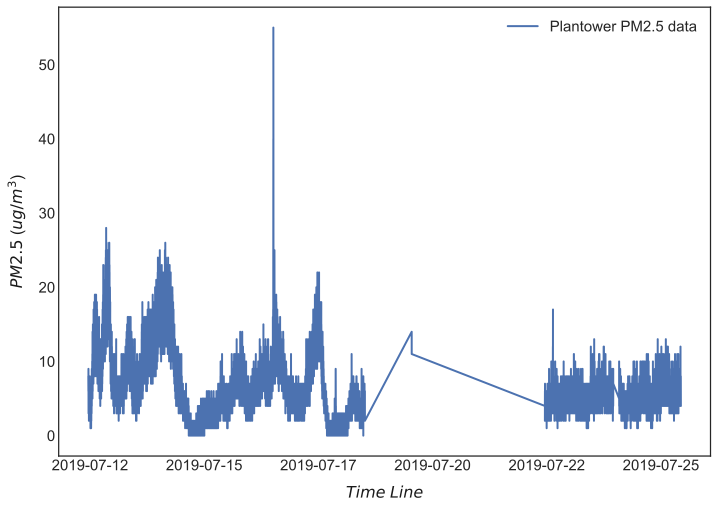

In [11]:
#df1['pm2.5']=savgol_filter(df1['pm2.5'], 31, 1)

fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax1.grid(False)

lns2=ax1.plot(df['time'],df['pm2.5'], linewidth=2,label='Plantower PM2.5 data')


lns = lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='best',fontsize=15,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('$PM2.5$ ($ug/m^3$)',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)

for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))


#ax1.fill_between(df['time'], df['pm2.5'],color='magenta',alpha=.1)
#myFmt = mdates.DateFormatter('%H:%M')
#ax1.xaxis.set_major_formatter(myFmt)

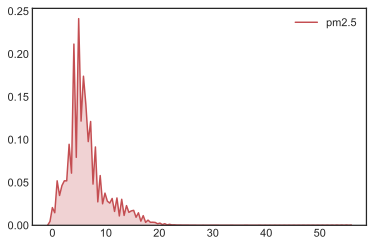

In [12]:
ax = sns.kdeplot(df['pm2.5'], shade=True, color="r")

In [13]:
q = df['pm2.5'].quantile(0.999)
df=df[df["pm2.5"] < q]

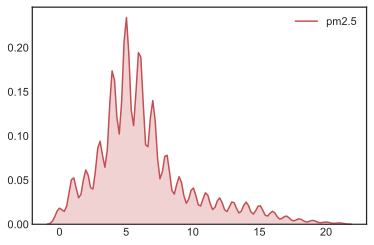

In [14]:
ax = sns.kdeplot(df['pm2.5'], shade=True, color="r")

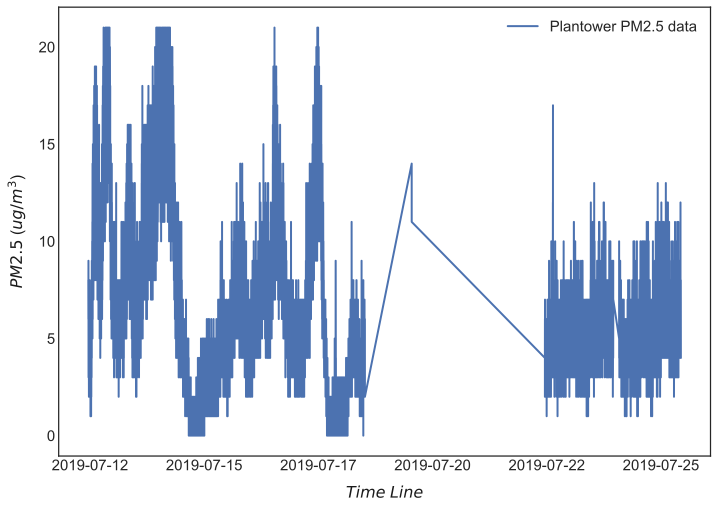

In [15]:
#df1['pm2.5']=savgol_filter(df1['pm2.5'], 31, 1)

fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax1.grid(False)

lns2=ax1.plot(df['time'],df['pm2.5'], linewidth=2,label='Plantower PM2.5 data')


lns = lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='best',fontsize=15,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('$PM2.5$ ($ug/m^3$)',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)

for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))


#ax1.fill_between(df['time'], df['pm2.5'],color='magenta',alpha=.1)
#myFmt = mdates.DateFormatter('%H:%M')
#ax1.xaxis.set_major_formatter(myFmt)

C:\Users\nuera\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


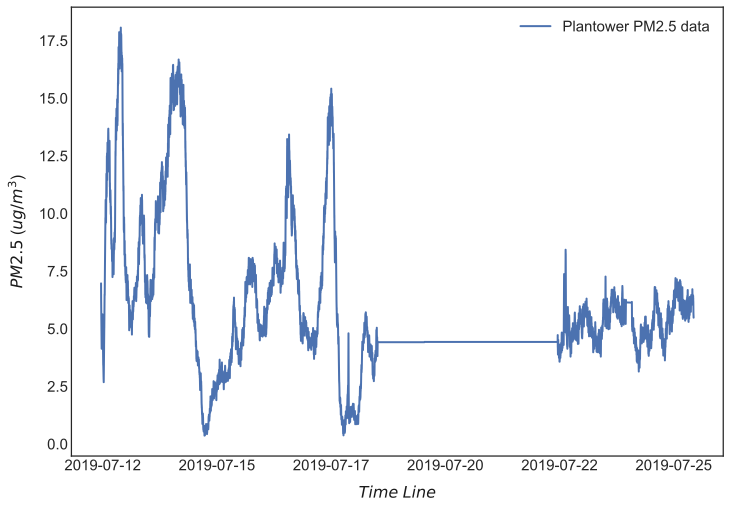

In [16]:
df['pm2.5']=savgol_filter(df['pm2.5'], 91, 1)

fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax1.grid(False)

lns2=ax1.plot(df['time'],df['pm2.5'], linewidth=2,label='Plantower PM2.5 data')


lns = lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='best',fontsize=15,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('$PM2.5$ ($ug/m^3$)',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)

for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))

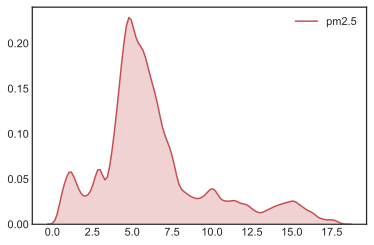

In [17]:
ax = sns.kdeplot(df['pm2.5'], shade=True, color="r")

In [18]:
df1=df['2019-07-13 11:00:01':'2019-07-14 11:00:01']
df1.head()

,time,id,pm1.0,pm2.5,pm10,0.3um,0.5um,1.0um,2.5um,5.0um,10um,temp,RH
time,,,,,,,,,,,,,


In [ ]:
df.head()

In [19]:
df=df.sort_values('id')

In [21]:
df.tail()

,time,id,pm1.0,pm2.5,pm10,0.3um,0.5um,1.0um,2.5um,5.0um,10um,temp,RH
time,,,,,,,,,,,,,
2019-07-25 10:27:31,2019-07-25 10:27:31,125245,5,5.490349,6,1029,273,40,0,0,0,23.920000,60.680000
2019-07-25 10:27:37,2019-07-25 10:27:37,125246,4,5.488103,6,954,261,33,0,0,0,23.940001,60.709999
2019-07-25 10:27:43,2019-07-25 10:27:43,125247,4,5.485858,5,882,231,30,0,0,0,23.940001,60.880001
2019-07-25 10:27:50,2019-07-25 10:27:50,125248,4,5.483612,4,750,207,25,0,0,0,23.920000,61.009998
2019-07-25 10:27:56,2019-07-25 10:27:56,125249,4,5.481366,4,741,207,29,0,0,0,23.980000,61.389999


In [22]:
df1=df['2019-07-13 11:00:01':'2019-07-14 11:00:01']
df1.head()

,time,id,pm1.0,pm2.5,pm10,0.3um,0.5um,1.0um,2.5um,5.0um,10um,temp,RH
time,,,,,,,,,,,,,
2019-07-13 11:00:01,2019-07-13 11:00:01,14074,4,6.340659,6,1059,268,33,2,0,0,23.820000,61.500000
2019-07-13 11:00:07,2019-07-13 11:00:07,14075,4,6.318681,6,1065,275,33,2,0,0,23.850000,61.549999
2019-07-13 11:00:13,2019-07-13 11:00:13,14076,5,6.296703,7,1056,287,28,2,0,0,23.860001,61.610001
2019-07-13 11:00:19,2019-07-13 11:00:19,14077,5,6.285714,6,981,279,19,2,0,0,23.850000,61.650002
2019-07-13 11:00:25,2019-07-13 11:00:25,14078,4,6.274725,7,834,249,28,2,2,2,23.860001,61.610001


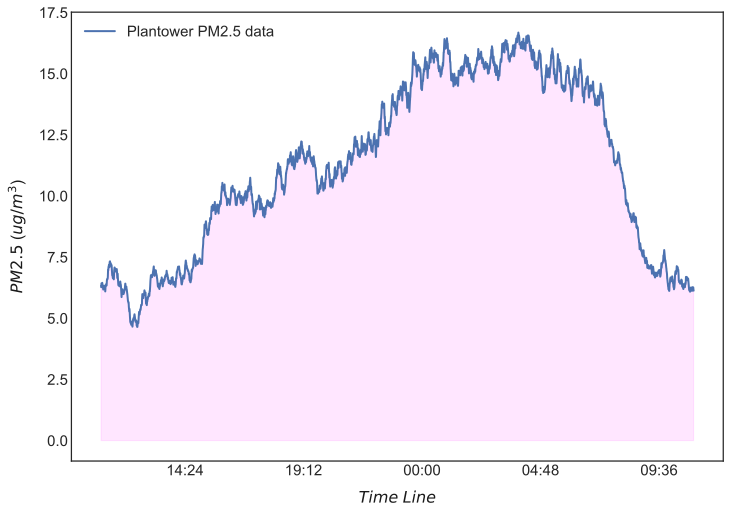

In [23]:

fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)

ax1.grid(False)

lns2=ax1.plot(df1['time'],df1['pm2.5'], linewidth=2,label='Plantower PM2.5 data')


lns = lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='best',fontsize=15,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('$PM2.5$ ($ug/m^3$)',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)

for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))


ax1.fill_between(df1['time'], df1['pm2.5'],color='magenta',alpha=.1)
myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)